# RNN - LSTM

## 1. Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
idx_features = range(1, 6)
idx_predict_raw = 1
idx_predict_for = 0
steps = 60
features = 5

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set = dataset_train.iloc[:,idx_features].values

In [5]:
training_set.shape

(1258, 5)

In [6]:
training_set[:10]

array([[325.25, 332.83, 324.97, '663.59', '7,380,500'],
       [331.27, 333.87, 329.08, '666.45', '5,749,400'],
       [329.83, 330.75, 326.89, '657.21', '6,590,300'],
       [328.34, 328.77, 323.68, '648.24', '5,405,900'],
       [322.04, 322.29, 309.46, '620.76', '11,688,800'],
       [313.7, 315.72, 307.3, '621.43', '8,824,000'],
       [310.59, 313.52, 309.4, '624.25', '4,817,800'],
       [314.43, 315.26, 312.08, '627.92', '3,764,400'],
       [311.96, 312.3, 309.37, '623.28', '4,631,800'],
       [314.81, 314.81, 311.67, '626.86', '3,832,800']], dtype=object)

In [7]:
transform = lambda item: item.replace(",", "") if type(item)==np.str else item
vfunc = np.vectorize(transform, otypes=[np.float])
training_set =  vfunc(training_set)
training_set[:10]

array([[  3.25250000e+02,   3.32830000e+02,   3.24970000e+02,
          6.63590000e+02,   7.38050000e+06],
       [  3.31270000e+02,   3.33870000e+02,   3.29080000e+02,
          6.66450000e+02,   5.74940000e+06],
       [  3.29830000e+02,   3.30750000e+02,   3.26890000e+02,
          6.57210000e+02,   6.59030000e+06],
       [  3.28340000e+02,   3.28770000e+02,   3.23680000e+02,
          6.48240000e+02,   5.40590000e+06],
       [  3.22040000e+02,   3.22290000e+02,   3.09460000e+02,
          6.20760000e+02,   1.16888000e+07],
       [  3.13700000e+02,   3.15720000e+02,   3.07300000e+02,
          6.21430000e+02,   8.82400000e+06],
       [  3.10590000e+02,   3.13520000e+02,   3.09400000e+02,
          6.24250000e+02,   4.81780000e+06],
       [  3.14430000e+02,   3.15260000e+02,   3.12080000e+02,
          6.27920000e+02,   3.76440000e+06],
       [  3.11960000e+02,   3.12300000e+02,   3.09370000e+02,
          6.23280000e+02,   4.63180000e+06],
       [  3.14810000e+02,   3.1481000

Feature scaling: Normalisation

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [9]:
training_set_scaled = np.zeros(training_set.shape)

In [10]:
sc_dict = {}
for idx in range(features):
    sc_dict[idx] = MinMaxScaler(feature_range=(0,1))
    new_value = sc_dict[idx].fit_transform(training_set[:,idx].reshape(-1,1))
    new_value = new_value.reshape((len(new_value),))
    training_set_scaled[:,idx] = new_value

In [11]:
training_set_scaled[1:10]

array([[ 0.09701243,  0.09834351,  0.09823458,  0.24151427,  0.22993592],
       [ 0.09433366,  0.09251685,  0.09408623,  0.22878051,  0.26361233],
       [ 0.09156187,  0.08881917,  0.08800576,  0.21641884,  0.21617942],
       [ 0.07984225,  0.07671765,  0.06106986,  0.1785483 ,  0.46779736],
       [ 0.0643277 ,  0.06444805,  0.05697833,  0.17947163,  0.35306768],
       [ 0.0585423 ,  0.06033951,  0.06095621,  0.18335791,  0.19262715],
       [ 0.06568569,  0.063589  ,  0.06603273,  0.18841558,  0.15044053],
       [ 0.06109085,  0.05806114,  0.06089938,  0.18202114,  0.18517821],
       [ 0.06639259,  0.06274861,  0.0652561 ,  0.18695478,  0.15317982]])

** Creating a data structure with 60 timesteps and 1 output **

In [12]:
X_train = np.zeros((len(training_set_scaled) - steps, steps, features))
y_train = np.zeros(len(training_set_scaled) - steps)

In [13]:
for idx in range(steps, len(training_set_scaled)):
    for jdx in range(steps):
        for kdx in range(features):
            X_train[idx - steps, jdx, kdx] = training_set_scaled[idx - steps + jdx, kdx]
    y_train[idx - steps] = training_set_scaled[idx, 0]

In [14]:
X_train.shape, y_train.shape

((1198, 60, 5), (1198,))

In [15]:
X_train[0]

array([[ 0.08581368,  0.09640129,  0.09044931,  0.23757287,  0.29525831],
       [ 0.09701243,  0.09834351,  0.09823458,  0.24151427,  0.22993592],
       [ 0.09433366,  0.09251685,  0.09408623,  0.22878051,  0.26361233],
       [ 0.09156187,  0.08881917,  0.08800576,  0.21641884,  0.21617942],
       [ 0.07984225,  0.07671765,  0.06106986,  0.1785483 ,  0.46779736],
       [ 0.0643277 ,  0.06444805,  0.05697833,  0.17947163,  0.35306768],
       [ 0.0585423 ,  0.06033951,  0.06095621,  0.18335791,  0.19262715],
       [ 0.06568569,  0.063589  ,  0.06603273,  0.18841558,  0.15044053],
       [ 0.06109085,  0.05806114,  0.06089938,  0.18202114,  0.18517821],
       [ 0.06639259,  0.06274861,  0.0652561 ,  0.18695478,  0.15317982],
       [ 0.0614257 ,  0.06463481,  0.06190332,  0.19290823,  0.22171005],
       [ 0.07474514,  0.07113377,  0.07071147,  0.2020589 ,  0.50660392],
       [ 0.02797827,  0.02463257,  0.0237536 ,  0.12842633,  0.84997597],
       [ 0.02379269,  0.02244757,  0.0

In [16]:
y_train[:10]

array([ 0.08627874,  0.08471612,  0.07454052,  0.07883771,  0.07238262,
        0.06663442,  0.06315574,  0.06782499,  0.06823424,  0.07601012])

**Reshaping the data**

https://keras.io/layers/recurrent/

To add new indicators

In [17]:
X_train.shape

(1198, 60, 5)

## 2. Building the RNN

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initializing the RNN

In [19]:
regressor = Sequential()

Configuring the LSTM neural network

* return_sequences=True if after the LSTM layer goes another LSTM layer
* optimizer: recomended "RMSprop"; "adam" also ok 

In [20]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], features)))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.20))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# epochs = 100

regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 5s - loss: 0.0413     
Epoch 2/100
1198/1198 [==============================] - 6s - loss: 0.0060     
Epoch 3/100
1198/1198 [==============================] - 4s - loss: 0.0049     
Epoch 4/100
1198/1198 [==============================] - 6s - loss: 0.0050     
Epoch 5/100
1198/1198 [==============================] - 6s - loss: 0.0050     
Epoch 6/100
1198/1198 [==============================] - 6s - loss: 0.0045     
Epoch 7/100
1198/1198 [==============================] - 6s - loss: 0.0049     
Epoch 8/100
1198/1198 [==============================] - 6s - loss: 0.0050     
Epoch 9/100
1198/1198 [==============================] - 8s - loss: 0.0040     
Epoch 10/100
1198/1198 [==============================] - 6s - loss: 0.0039     
Epoch 11/100
1198/1198 [==============================] - 5s - loss: 0.0039     
Epoch 12/100
1198/1198 [==============================] - 7s - loss: 0.0036     
Epoch 13/100
1198/1198 [=============

## 3. Making the predictions and visualising the results

Getting the real stock price of 2017

In [22]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,idx_predict_raw].values

Getting the predicted stock price of 2017

In [23]:
dataset_total = pd.concat((dataset_train, dataset_test), axis=0)

inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - 60:,idx_features].values

In [24]:
inputs.shape

(80, 5)

In [25]:
inputs[:10]

array([[779.0, 780.48, 775.54, '776.86', '1,070,700'],
       [779.66, 779.66, 770.75, '775.08', '933,200'],
       [777.71, 789.38, 775.87, '785.94', '1,174,900'],
       [786.66, 792.28, 780.58, '783.07', '1,372,500'],
       [783.76, 788.13, 782.06, '786.14', '937,400'],
       [781.22, 781.22, 773.0, '778.19', '1,365,300'],
       [781.65, 783.95, 776.0, '778.53', '852,500'],
       [779.8, 785.85, 777.5, '779.96', '1,093,000'],
       [787.85, 801.61, 785.57, '795.26', '2,056,900'],
       [798.24, 804.6, 798.03, '801.5', '1,766,800']], dtype=object)

In [26]:
inputs =  vfunc(inputs)
inputs[:10]

array([[  7.79000000e+02,   7.80480000e+02,   7.75540000e+02,
          7.76860000e+02,   1.07070000e+06],
       [  7.79660000e+02,   7.79660000e+02,   7.70750000e+02,
          7.75080000e+02,   9.33200000e+05],
       [  7.77710000e+02,   7.89380000e+02,   7.75870000e+02,
          7.85940000e+02,   1.17490000e+06],
       [  7.86660000e+02,   7.92280000e+02,   7.80580000e+02,
          7.83070000e+02,   1.37250000e+06],
       [  7.83760000e+02,   7.88130000e+02,   7.82060000e+02,
          7.86140000e+02,   9.37400000e+05],
       [  7.81220000e+02,   7.81220000e+02,   7.73000000e+02,
          7.78190000e+02,   1.36530000e+06],
       [  7.81650000e+02,   7.83950000e+02,   7.76000000e+02,
          7.78530000e+02,   8.52500000e+05],
       [  7.79800000e+02,   7.85850000e+02,   7.77500000e+02,
          7.79960000e+02,   1.09300000e+06],
       [  7.87850000e+02,   8.01610000e+02,   7.85570000e+02,
          7.95260000e+02,   2.05690000e+06],
       [  7.98240000e+02,   8.0460000

In [27]:
for idx in range(features):
    new_value = sc_dict[idx].fit_transform(inputs[:,idx].reshape(-1,1))
    new_value = new_value.reshape((len(new_value),))
    inputs[:,idx] = new_value

In [28]:
inputs[:10]

array([[ 0.3691268 ,  0.30108016,  0.48255756,  0.40947886,  0.11623936],
       [ 0.37620682,  0.29175668,  0.43440233,  0.39160558,  0.08316898],
       [ 0.35528856,  0.40227402,  0.48587514,  0.50065268,  0.14130069],
       [ 0.451298  ,  0.4352473 ,  0.5332261 ,  0.47183452,  0.18882582],
       [ 0.4201888 ,  0.3880614 ,  0.54810496,  0.50266091,  0.08417913],
       [ 0.39294143,  0.30949403,  0.45702222,  0.42283362,  0.18709414],
       [ 0.39755417,  0.34053439,  0.48718206,  0.42624762,  0.06375968],
       [ 0.37770865,  0.36213758,  0.50226199,  0.44060649,  0.12160277],
       [ 0.46406351,  0.5413303 ,  0.58339198,  0.59423637,  0.3534321 ],
       [ 0.57552027,  0.57532689,  0.70865588,  0.65689326,  0.28365963]])

In [29]:
X_test = np.zeros((len(inputs) - steps, steps, features))

In [30]:
for idx in range(steps, len(inputs)):
    for jdx in range(steps):
        for kdx in range(features):
            X_test[idx - steps, jdx, kdx] = inputs[idx - steps + jdx, kdx]

In [31]:
# X_test = []
# for i in range(60, len(inputs)):
#     X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)

In [32]:
X_test.shape

(20, 60, 5)

In [33]:
predicted_stock_price = regressor.predict(X_test)

In [34]:
predicted_stock_price = sc_dict[idx_predict_for].inverse_transform(predicted_stock_price)

In [35]:
predicted_stock_price.shape

(20, 1)

In [36]:
predicted_stock_price

array([[ 786.63781738],
       [ 784.10943604],
       [ 784.16046143],
       [ 786.72680664],
       [ 792.32971191],
       [ 799.12689209],
       [ 803.68682861],
       [ 805.10565186],
       [ 804.50079346],
       [ 804.29046631],
       [ 804.05993652],
       [ 803.80627441],
       [ 803.81018066],
       [ 804.24591064],
       [ 806.9072876 ],
       [ 812.42028809],
       [ 819.95898438],
       [ 825.46044922],
       [ 826.15167236],
       [ 819.36645508]], dtype=float32)

Visualizing the final results

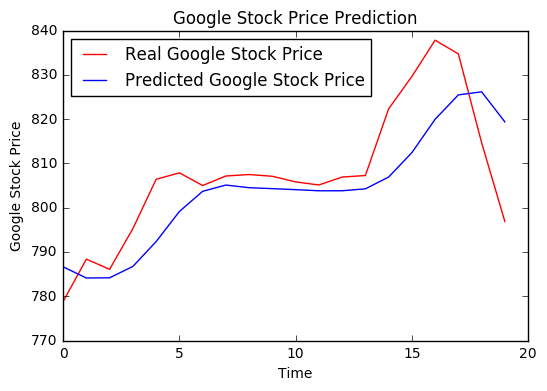

In [39]:
plt.plot(real_stock_price, color = 'red', 
         label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', 
         label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(loc=2)
plt.show()